In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, filters
from skimage.segmentation import slic, mark_boundaries
from skimage.feature import canny
from skimage.color import rgb2gray
import torch
from torchvision import models, transforms
from PIL import Image

In [2]:

def edge_based_segmentation(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Error: Could not load image at {image_path}")
    edges = cv2.Canny(image, 100, 200)
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edge Detection')
    plt.show()



In [3]:
# Task 1.2: Region-based segmentation using SLIC
def region_based_segmentation(image_path):
    image = cv2.imread(image_path)
    segments = slic(image, n_segments=100, compactness=10)
    plt.imshow(mark_boundaries(image, segments))
    plt.title('SLIC Segmentation')
    plt.show()

In [4]:

# Task 1.3: Hough Transform for line and circle detection
def hough_transform(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(image, 50, 150)

    # Detect lines
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)
    result = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a, b = np.cos(theta), np.sin(theta)
            x0, y0 = a * rho, b * rho
            x1, y1 = int(x0 + 1000 * (-b)), int(y0 + 1000 * (a))
            x2, y2 = int(x0 - 1000 * (-b)), int(y0 - 1000 * (a))
            cv2.line(result, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Detect circles
    circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(result, (i[0], i[1]), i[2], (255, 0, 0), 2)

    plt.imshow(result)
    plt.title('Hough Transform for Lines and Circles')
    plt.show()

In [5]:

# Task 2.1: Object Detection using YOLO (Pretrained Model)
def object_detection_yolo(image_path):
    model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
    img = Image.open(image_path)
    results = model(img)
    results.show()


In [6]:

# Task 2.2: Object Detection using Faster-RCNN (Pretrained Model)
def object_detection_rcnn(image_path):
    model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    model.eval()
    transform = transforms.Compose([transforms.ToTensor()])
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0)
    output = model(image_tensor)
    print(output)


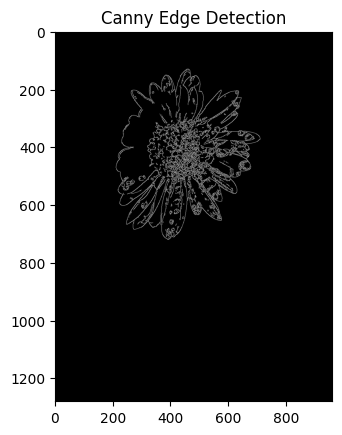

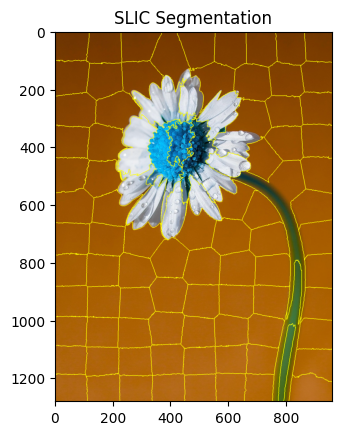

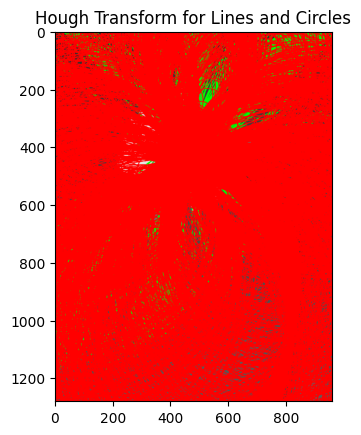

/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-4-5 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 182MB/s]

Fusing layers... 


In [ ]:

# Example usage
image_path = '/content/daisy-8476666_1280.jpg'
edge_based_segmentation(image_path)
region_based_segmentation(image_path)
hough_transform(image_path)
object_detection_yolo(image_path)
object_detection_rcnn(image_path)
